In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data set using pandas
data = pd.read_csv('Mall_Customers.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.shape

(200, 5)

In [4]:
#renaming the column
data.rename(columns = {'Annual Income (k$)': 'Income','Spending Score (1-100)': 'Score'}, inplace = True)
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#copy the data
ds = data.copy()

In [6]:
#checking for duplicated if any
ds.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
195    False
196    False
197    False
198    False
199    False
Length: 200, dtype: bool

In [7]:
#getting the data info
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  200 non-null    int64 
 1   Gender      200 non-null    object
 2   Age         200 non-null    int64 
 3   Income      200 non-null    int64 
 4   Score       200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#checking for missing data 
ds.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [9]:
#checking for data wit high standard deviation
ds.describe()

,CustomerID,Age,Income,Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [10]:
# Encode the 'Gender' column
label_encoder = LabelEncoder()
ds['Gender'] = label_encoder.fit_transform(ds['Gender'])

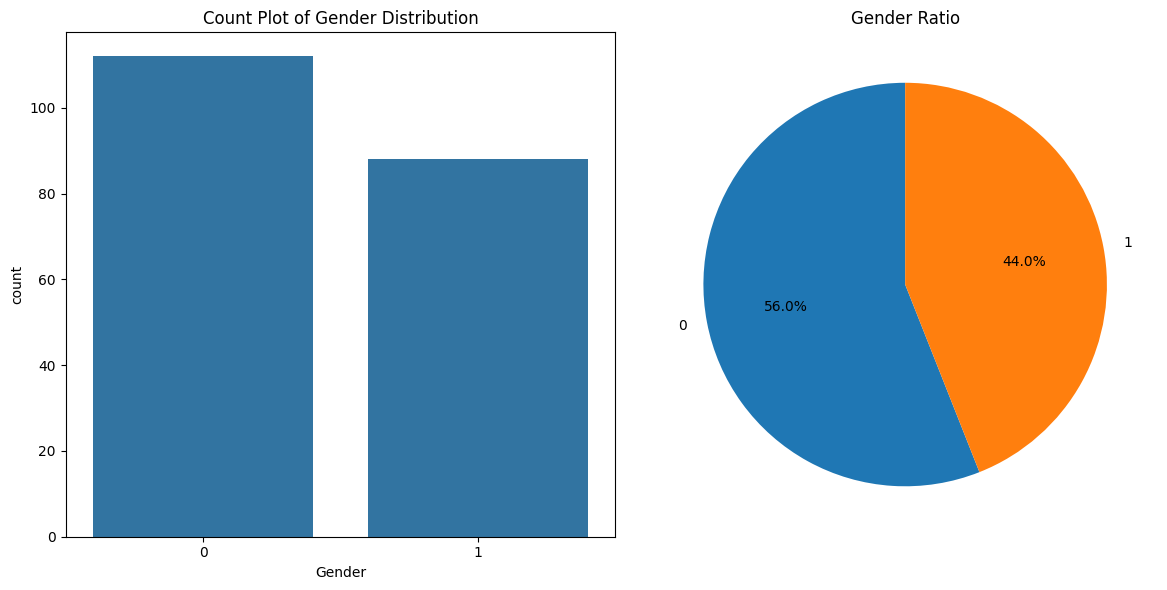

In [11]:


# Assuming 'ds' is your DataFrame containing customer data
_, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

# Count plot for Gender
sns.countplot(x="Gender", data=ds, ax=ax1)
ax1.set_title("Count Plot of Gender Distribution")

# Pie chart for Gender Ratio
ds.groupby("Gender").size().plot.pie(autopct="%.1f%%", ax=ax2, startangle=90)
ax2.set_title("Gender Ratio")
ax2.set_ylabel("")  # Remove y-label for clarity

plt.tight_layout()
plt.show()


In [12]:
# Select relevant features for clustering
features = ds[['Gender','Age','Income','Score']]

# Normalize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [13]:
#preprocessing the data to ascertain customer purchase history
x = ds[['Income','Score']]
x.head()

,Income,Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


EXPLORATORY DATA ANALYSIS(EDA)

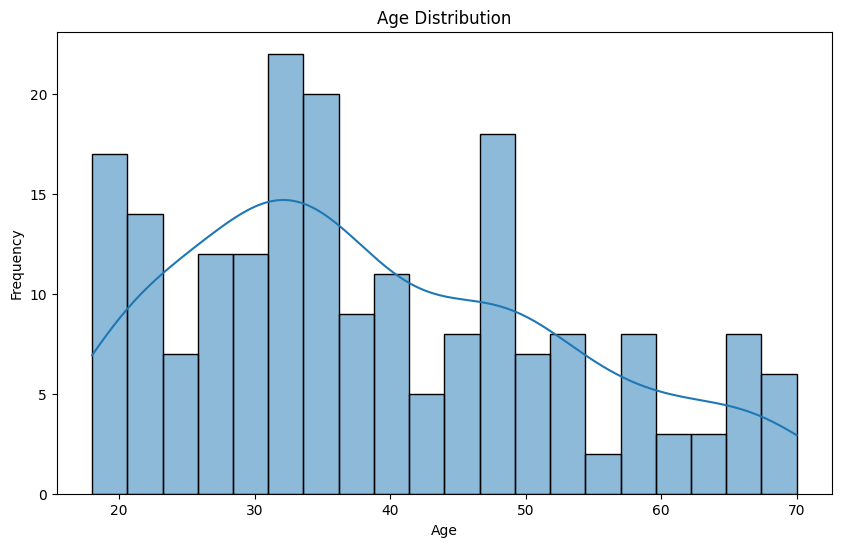

In [14]:
# Plotting the distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(ds['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

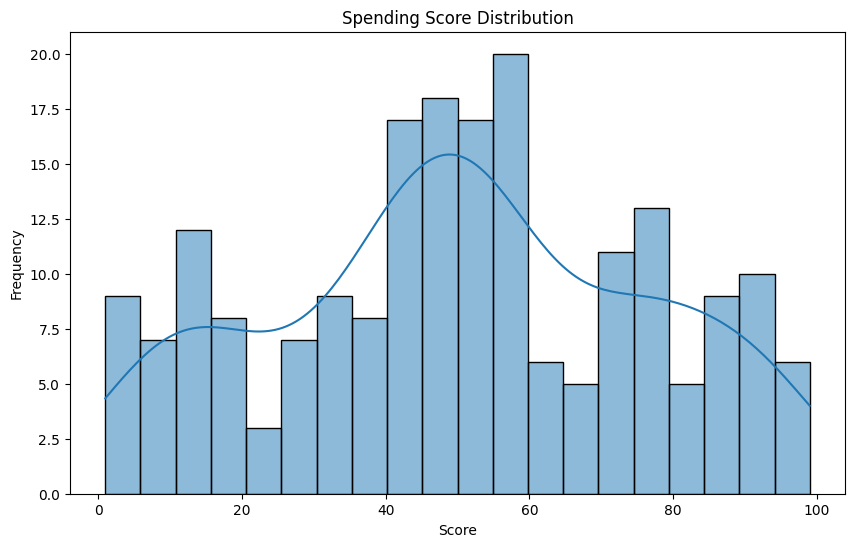

In [15]:
# Plotting the distribution of Spending Score
plt.figure(figsize=(10, 6))
sns.histplot(ds['Score'], bins=20, kde=True)
plt.title('Spending Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()


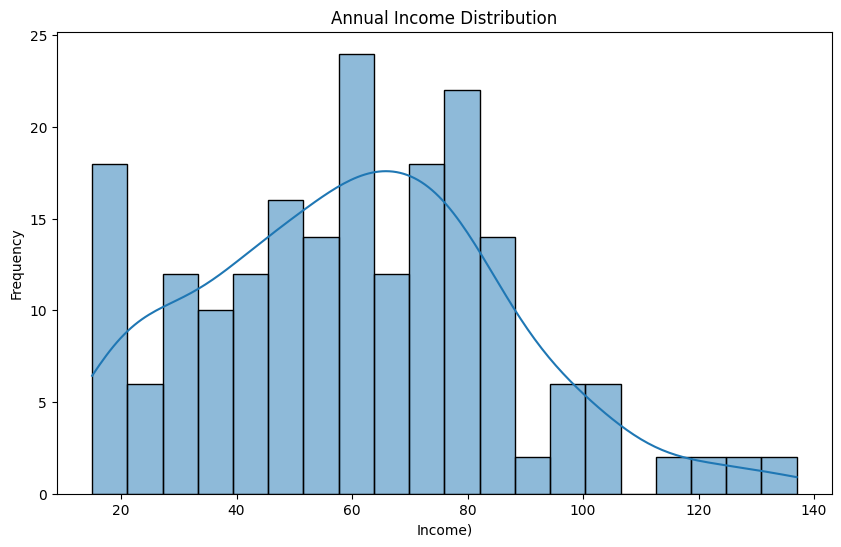

In [16]:
# Plotting the distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(ds['Income'], bins=20, kde=True)
plt.title('Annual Income Distribution')
plt.xlabel('Income)')
plt.ylabel('Frequency')
plt.show()


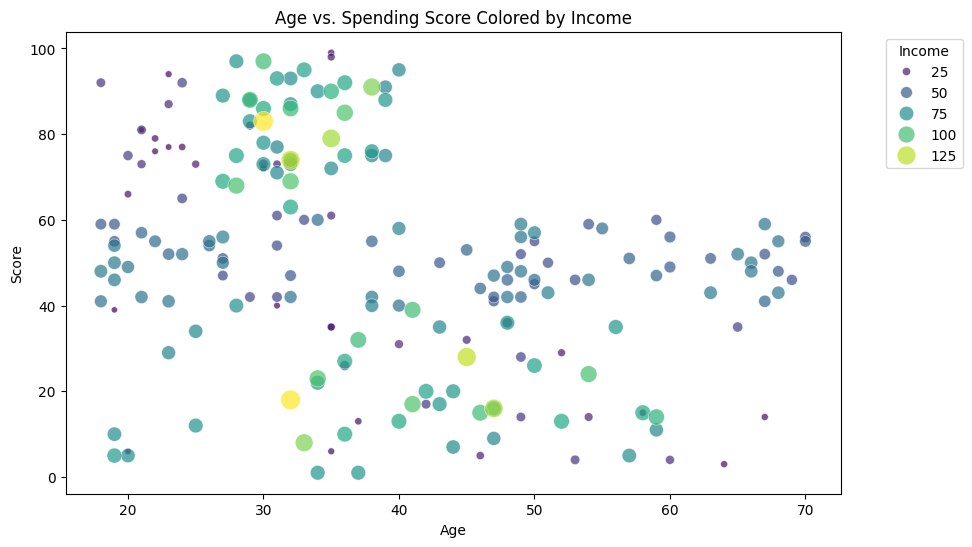

In [17]:
# Scatter plot for Age vs. Spending Score colored by Income
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Age', y='Score', hue='Income', palette='viridis', alpha=0.7, size='Income', sizes=(20, 200))
plt.title('Age vs. Spending Score Colored by Income')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


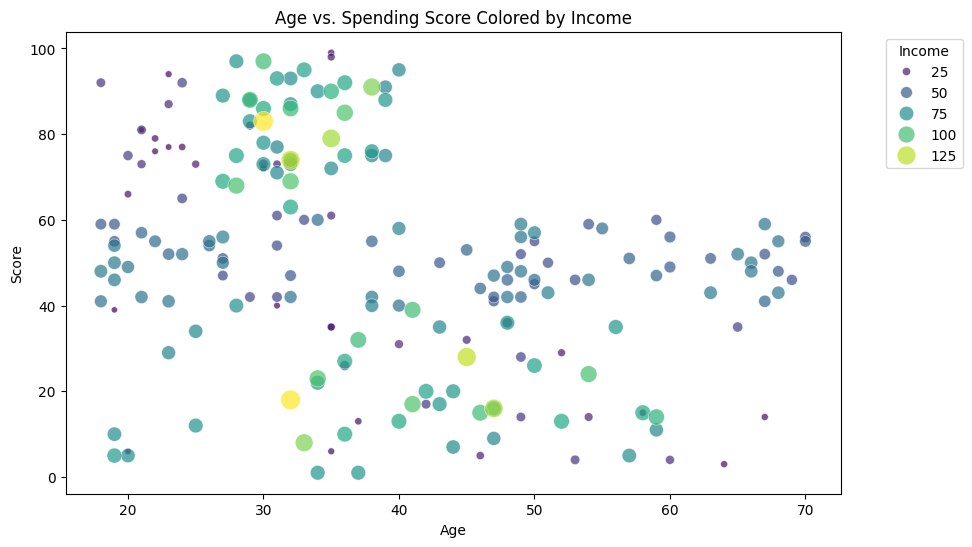

In [18]:
# Scatter plot for Age vs. Spending Score colored by Income for clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=ds, x='Age', y='Score', hue='Income', palette='viridis', alpha=0.7, size='Income', sizes=(20, 200))
plt.title('Age vs. Spending Score Colored by Income')
plt.xlabel('Age')
plt.ylabel('Score')
plt.legend(title='Income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [20]:
#installing machine learning libarys to used clustering nd kmeans
pip install yellowbrick


SyntaxError: invalid syntax (4263880211.py, line 2)

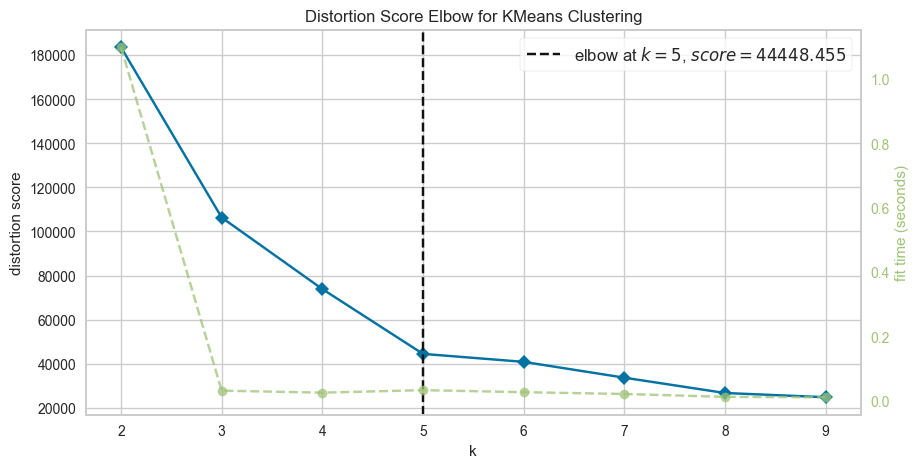

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Using Machine Knowledge to ascertain optimal number of clusters
#install yellowbrick to vizualize the Elbow curve
# !pip install yellowbrick  --q

from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm
from yellowbrick.cluster import KElbowVisualizer # ----------------------------- Instantiate the plotting library

# Instantiate the clustering model and visualizer
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,10))

plt.figure(figsize = (10, 5))
visualizer.fit(x) #............................................................. Fit the data to the visualizer
visualizer.show() #............................................................. Finalize and render the figure

In [22]:
from sklearn.cluster import KMeans # ------------------------------------------- Instantiate the KMeans algorithm

kmeans_model = KMeans(n_clusters = 5,    # ............................................... number of clusters we want
            init = 'k-means++',
            n_init = 10,
            max_iter = 100,
            random_state = 42)

kmeans_model

KMeans(max_iter=100, n_clusters=5, n_init=10, random_state=42)

In [23]:
cluster_predict = kmeans_model.fit_predict(x)
x['Cluster'] = cluster_predict
x

,Income,Score,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4
...,...,...,...
195,120,79,1
196,126,28,3
197,126,74,1
198,137,18,3


Text(0.5, 1.0, 'Customer Cluster Visualization')

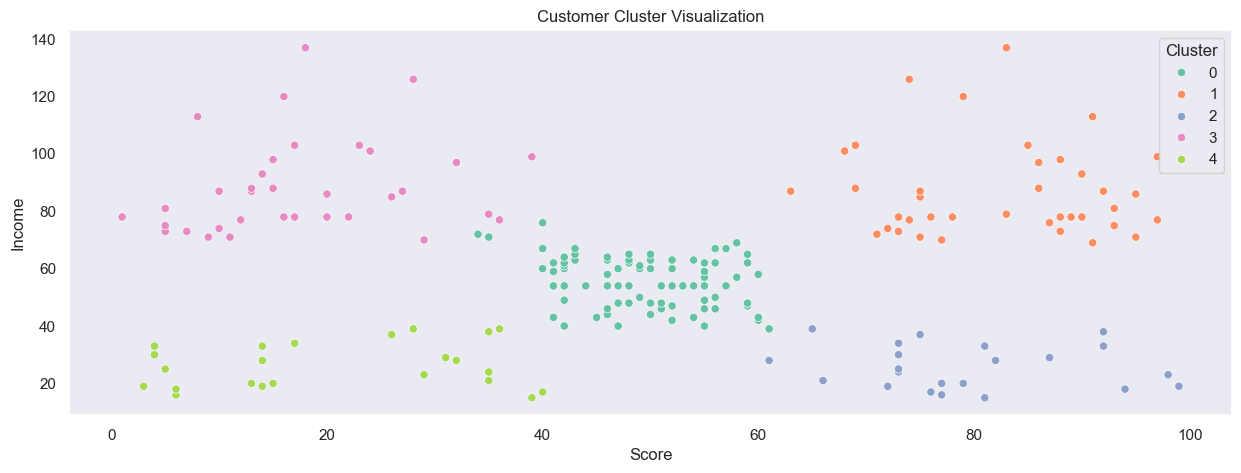

In [24]:
# Visualize to show clear clusters of customer classes
sns.set(style = 'darkgrid')
plt.figure(figsize = (15, 5))
plt.grid(False)
sns.scatterplot(x = x['Score'], y = x['Income'], hue = x['Cluster'], palette = 'Set2')
plt.title('Customer Cluster Visualization')

In [ ]:
#librarys for plotly libraries
pip install --upgrade nbformat
pip install ipython

In [25]:
#visualizing the clusters using ploty
import plotly.express as px

dfs = x.astype({"Cluster": "object"})
dfs = dfs.sort_values("Cluster")

fig = px.scatter(
      dfs,
      x='Score',
      y='Income',
      color='Cluster',
      title='Customer Clustering Segments based on Annual Income and Spending Score')
fig.show()

,Income,Score,Cluster,ClusterInterprete
0,15,39,4,LowIncome_LowSpend
1,15,81,2,LowIncome_HighSpend
2,16,6,4,LowIncome_LowSpend
3,16,77,2,LowIncome_HighSpend
4,17,40,4,LowIncome_LowSpend


Text(0.5, 1.0, 'Customer Segments based on Annual Income and Spending Score')

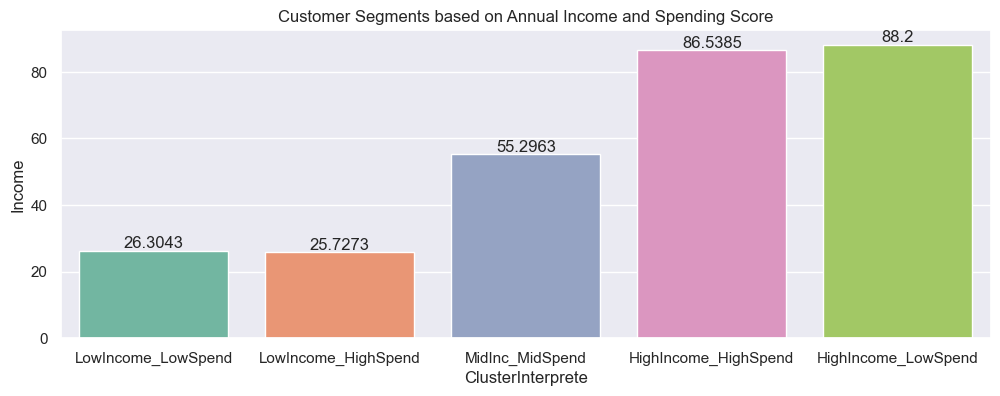

In [26]:
x['ClusterInterprete'] = x.Cluster.map({3:'HighIncome_LowSpend',
                               1: 'HighIncome_HighSpend',
                               2: 'LowIncome_HighSpend',
                               4: 'LowIncome_LowSpend',
                               0: 'MidInc_MidSpend'})
display(x.head())

plt.figure(figsize = (12,4))
fig = sns.barplot(x = x.ClusterInterprete, y = x.Income, palette = 'Set2', ci = 0)
for i in fig.containers:
    fig.bar_label(i)
plt.title('Customer Segments based on Annual Income and Spending Score')